In [213]:
import pandas
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

Vamos a cargar el [Boston housing dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) de sklearn y la idea es entrenar un modelo cuya variable target es el precio de las casas en miles de dolares (de 1996), teniendo como entrada 13 variables, entre ellas: edad de la casa, la tasa de crimen de la zona, etc.

In [23]:
X, y = load_boston(return_X_y=True)

Primero definimos el modelo, para ello usamos la herramienta sequential de keras que nos permite definir modelos sequenciales. Vamos a usar además capas densas, con dunciones de activación ReLu para la capa oculta y lineal para la capa de salida(regresión). 

Usaremos en un principio el optimizador SGD y la función de pérdida será MSE. Una vez que definimos el modelo, keras necesita que compilemos el modelo.

In [60]:
model = Sequential()
model.add(Dense(3, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
opt = keras.optimizers.SGD(learning_rate=0.3)
model.compile(loss='mean_squared_error', optimizer=opt)

Posteriormente dividimos el dataset en training y validation

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Finalmente entrenamos el modelo, pasandole los datos de training y validation, y observamos el resultado de la función de costo para cada época.

In [132]:
history = model.fit(X_train, y_train,
          batch_size=16,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 404 samples, validate on 102 samples
Epoch 1/10
404/404 [==============================] - 0s 115us/step - loss: 87.6211 - val_loss: 74.4586
Epoch 2/10
404/404 [==============================] - 0s 113us/step - loss: 87.5833 - val_loss: 76.1069
Epoch 3/10
404/404 [==============================] - 0s 99us/step - loss: 87.5552 - val_loss: 77.6163
Epoch 4/10
404/404 [==============================] - 0s 94us/step - loss: 87.4904 - val_loss: 74.2954
Epoch 5/10
404/404 [==============================] - 0s 86us/step - loss: 87.3776 - val_loss: 74.1575
Epoch 6/10
404/404 [==============================] - 0s 61us/step - loss: 87.6608 - val_loss: 73.4516
Epoch 7/10
404/404 [==============================] - 0s 53us/step - loss: 87.2922 - val_loss: 74.6536
Epoch 8/10
404/404 [==============================] - 0s 66us/step - loss: 87.5449 - val_loss: 77.1210
Epoch 9/10
404/404 [==============================] - 0s 47us/step - loss: 87.9279 - val_loss: 73.9438
Epoch 10/10
404/404 [====

Ahora graficamos la evolución de la función de costo con las épocas:

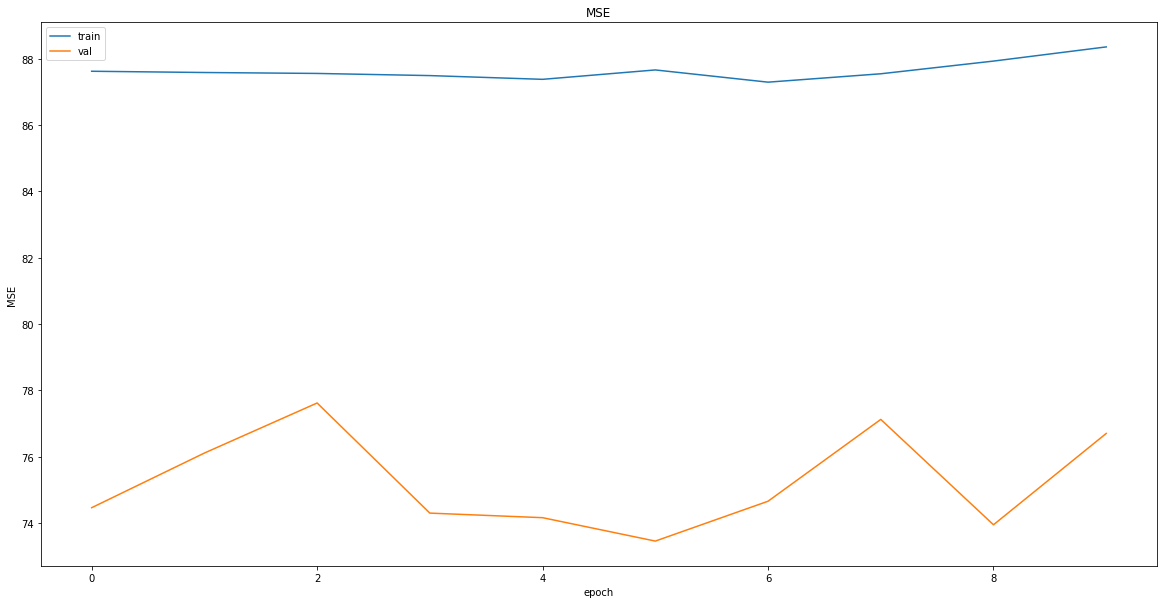

In [133]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

El error es muy grande por lo que nuestro modelo no es muy bueno:

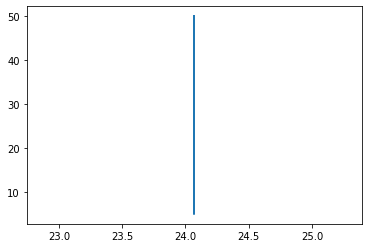

In [146]:
plt.plot(model.predict(X_test), y_test)

Intentamos mejorar la capacidad del modelo aumentando la cantidad de neuronas y dejando entrenar más épocas:

In [153]:
model2 = Sequential()
model2.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model2.add(Dense(1, kernel_initializer='normal'))
opt2 = keras.optimizers.SGD(learning_rate=0.1)
model2.compile(loss='mean_squared_error', optimizer=opt2)

In [160]:
history_2 = model2.fit(X_train, y_train,
          batch_size=16,
          epochs=50,
          verbose=0,
          validation_data=(X_test, y_test))

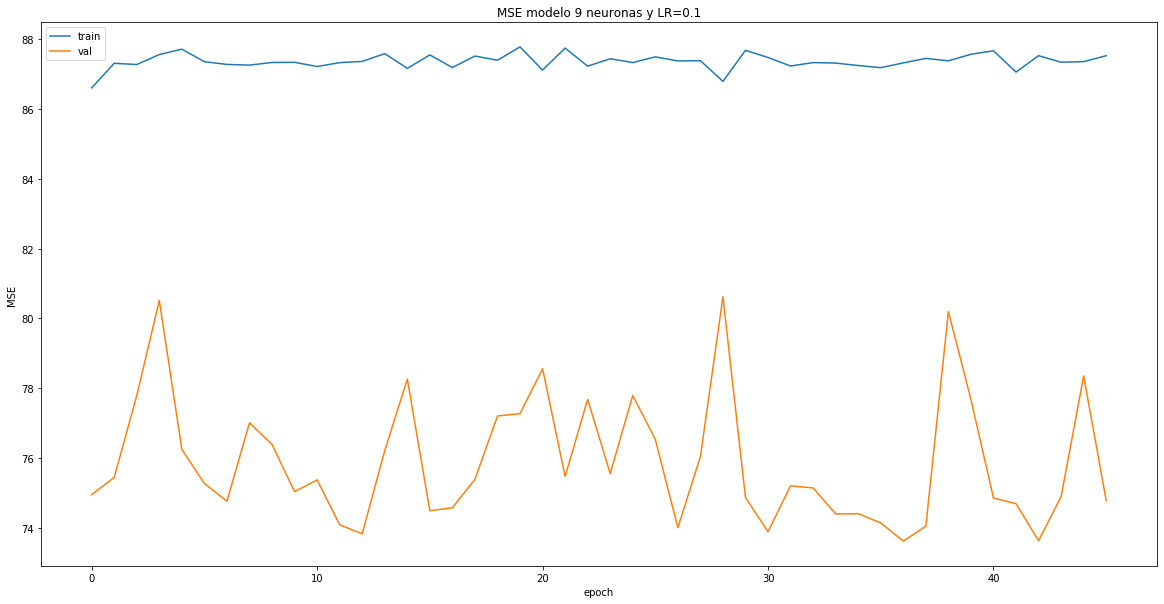

In [161]:
plt.figure(figsize=(20,10))
plt.plot(history_2.history['loss'][4:])
plt.plot(history_2.history['val_loss'][4:])
plt.title('MSE modelo 9 neuronas y LR=0.1')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Vemos sin embargo que es muy errático el error y muy alto, probemos reduciendo el learning rate

In [199]:
model3 = Sequential()
model3.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model3.add(Dense(1, kernel_initializer='normal'))
opt3 = keras.optimizers.SGD(learning_rate=0.5)
model3.compile(loss='mean_squared_error', optimizer=opt3)

In [200]:
history_3 = model3.fit(X_train, y_train,
          batch_size=12,
          epochs=50,
          verbose=0,
          validation_data=(X_test, y_test))

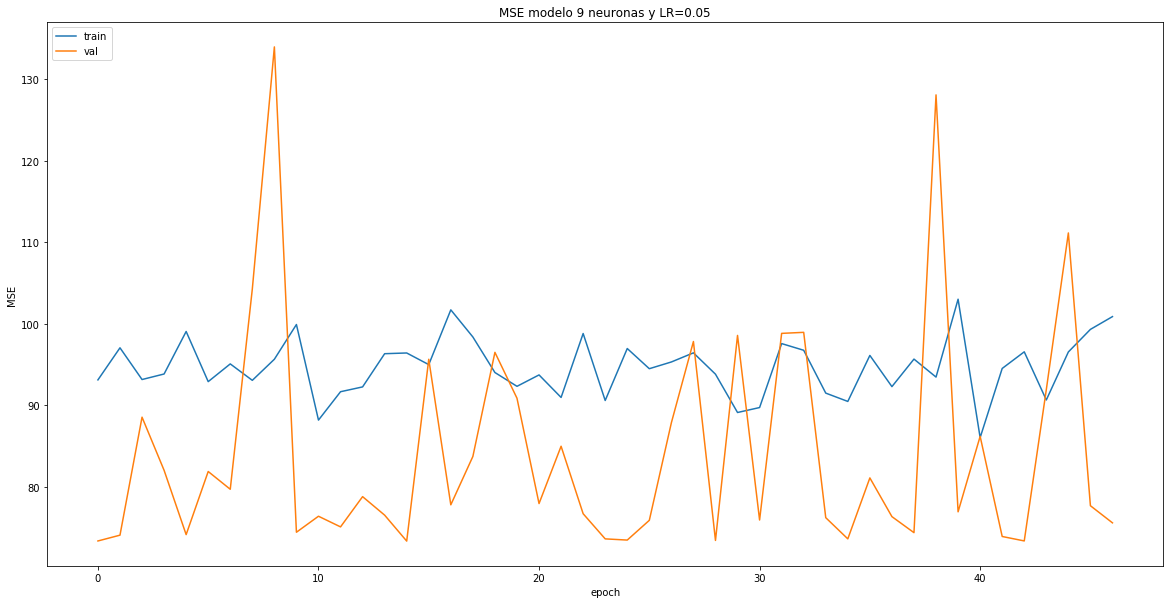

In [201]:
plt.figure(figsize=(20,10))
plt.plot(history_3.history['loss'][3:])
plt.plot(history_3.history['val_loss'][3:])
plt.title('MSE modelo 9 neuronas y LR=0.05')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Probemos cambiando el optimizador por uno más sofisticado: Adam

In [203]:
model4 = Sequential()
model4.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model4.add(Dense(1, kernel_initializer='normal'))
opt4 = keras.optimizers.Adam(learning_rate=0.05)
model4.compile(loss='mean_squared_error', optimizer=opt4)

In [204]:
history_4 = model4.fit(X_train, y_train,
          batch_size=12,
          epochs=50,
          verbose=0,
          validation_data=(X_test, y_test))

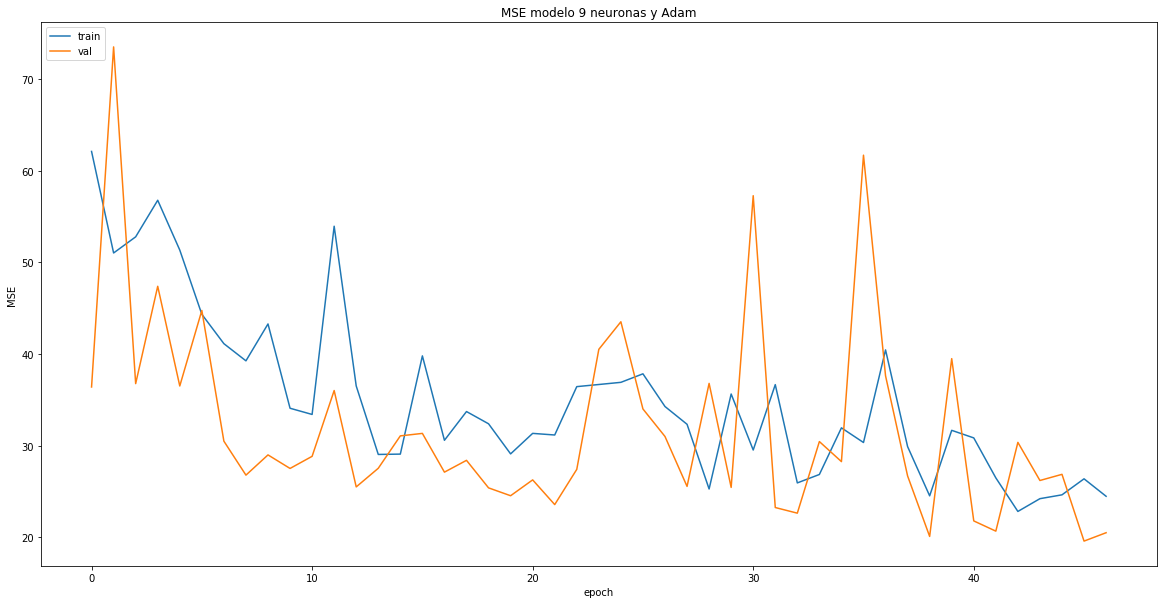

In [206]:
plt.figure(figsize=(20,10))
plt.plot(history_4.history['loss'][3:])
plt.plot(history_4.history['val_loss'][3:])
plt.title('MSE modelo 9 neuronas y Adam')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Vemos que el error bajó. Dejamos ahora entrenar el modelo más épocas a ver a donde llega:

In [209]:
model4 = Sequential()
model4.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model4.add(Dense(1, kernel_initializer='normal'))
opt4 = keras.optimizers.Adam(learning_rate=0.05)
model4.compile(loss='mean_squared_error', optimizer=opt4)
history_4 = model4.fit(X_train, y_train,
          batch_size=12,
          epochs=500,
          verbose=0,
          validation_data=(X_test, y_test))

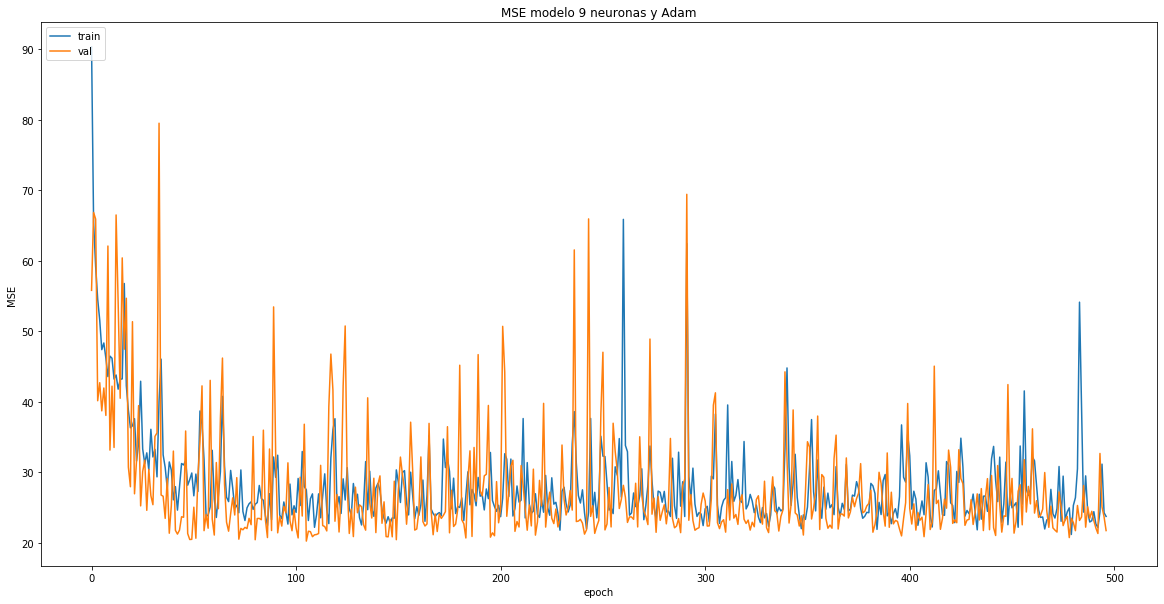

In [210]:
plt.figure(figsize=(20,10))
plt.plot(history_4.history['loss'][3:])
plt.plot(history_4.history['val_loss'][3:])
plt.title('MSE modelo 9 neuronas y Adam')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
El error sigue errático, voy a agregarle una capa y una capa de dropout en el medio.

In [216]:
model4 = Sequential()
model4.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model4.add(Dropout(0.25))
model4.add(Dense(1, kernel_initializer='normal'))
opt4 = keras.optimizers.Adam(learning_rate=0.01)
model4.compile(loss='mean_squared_error', optimizer=opt4)
history_4 = model4.fit(X_train, y_train,
          batch_size=12,
          epochs=500,
          verbose=0,
          validation_data=(X_test, y_test))

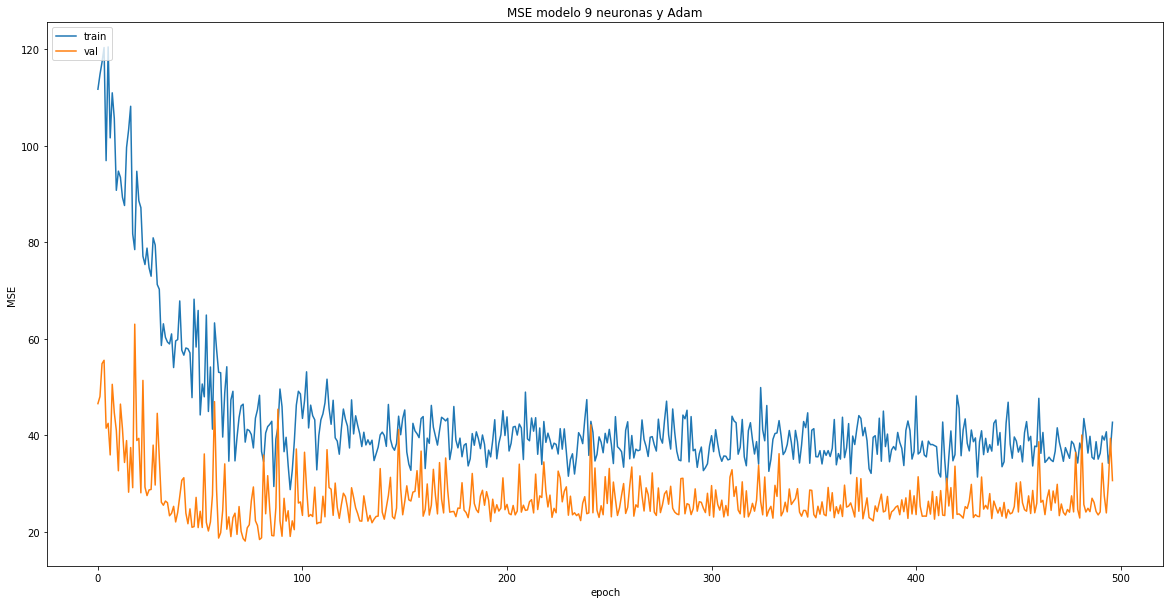

In [217]:
plt.figure(figsize=(20,10))
plt.plot(history_4.history['loss'][3:])
plt.plot(history_4.history['val_loss'][3:])
plt.title('MSE modelo 9 neuronas, Adam y dropout')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Que pasa si seguimos agregando capas?

In [218]:
model5 = Sequential()
model5.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model5.add(Dropout(0.25))
model5.add(Dense(13, kernel_initializer='normal', activation='relu'))
model5.add(Dense(13, kernel_initializer='normal', activation='relu'))
model5.add(Dense(1, kernel_initializer='normal'))
opt4 = keras.optimizers.Adam(learning_rate=0.01)
model5.compile(loss='mean_squared_error', optimizer=opt4)
history_5 = model5.fit(X_train, y_train,
          batch_size=12,
          epochs=500,
          verbose=0,
          validation_data=(X_test, y_test))

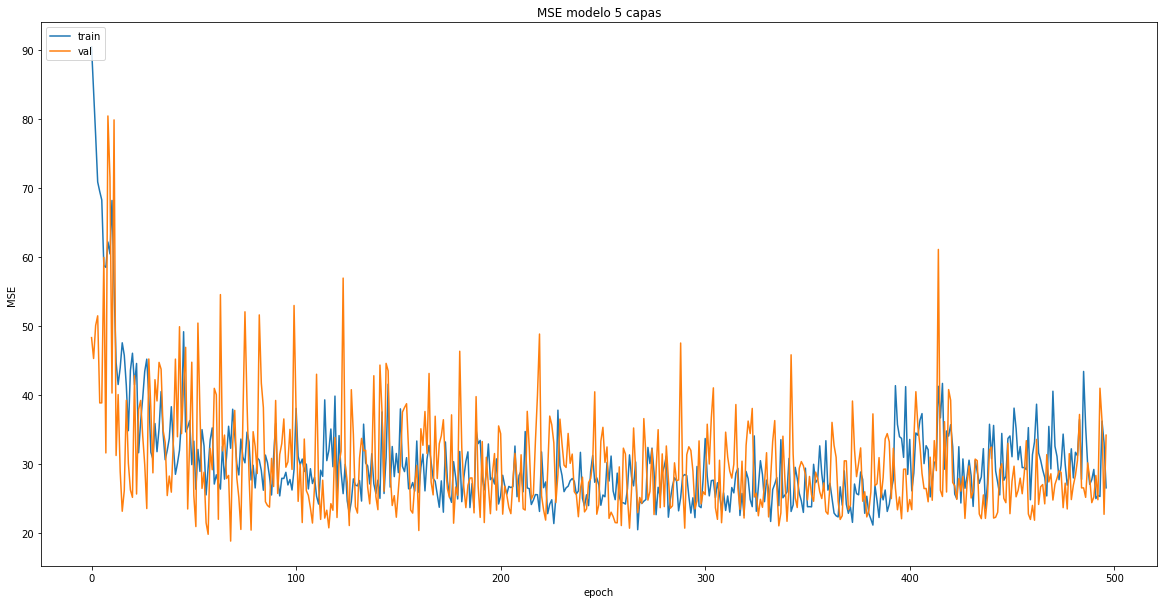

In [219]:
plt.figure(figsize=(20,10))
plt.plot(history_5.history['loss'][3:])
plt.plot(history_5.history['val_loss'][3:])
plt.title('MSE modelo 5 capas')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

No necesariamente el modelo mejora al agregarle capas y neuronas (parámetros a ajustar)

In [260]:
model6 = Sequential()
model6.add(Dense(100, input_dim=13, kernel_initializer='normal', activation='relu'))
model6.add(Dense(100, kernel_initializer='normal', activation='relu'))
model6.add(Dense(100, kernel_initializer='normal', activation='relu'))
model6.add(Dense(1, kernel_initializer='normal'))
opt4 = keras.optimizers.Adam(learning_rate=0.01)
model6.compile(loss='mean_squared_error', optimizer=opt4)
history_6 = model6.fit(X_train, y_train,
          batch_size=12,
          epochs=1000,
          verbose=0,
         validation_data=(X_test, y_test))

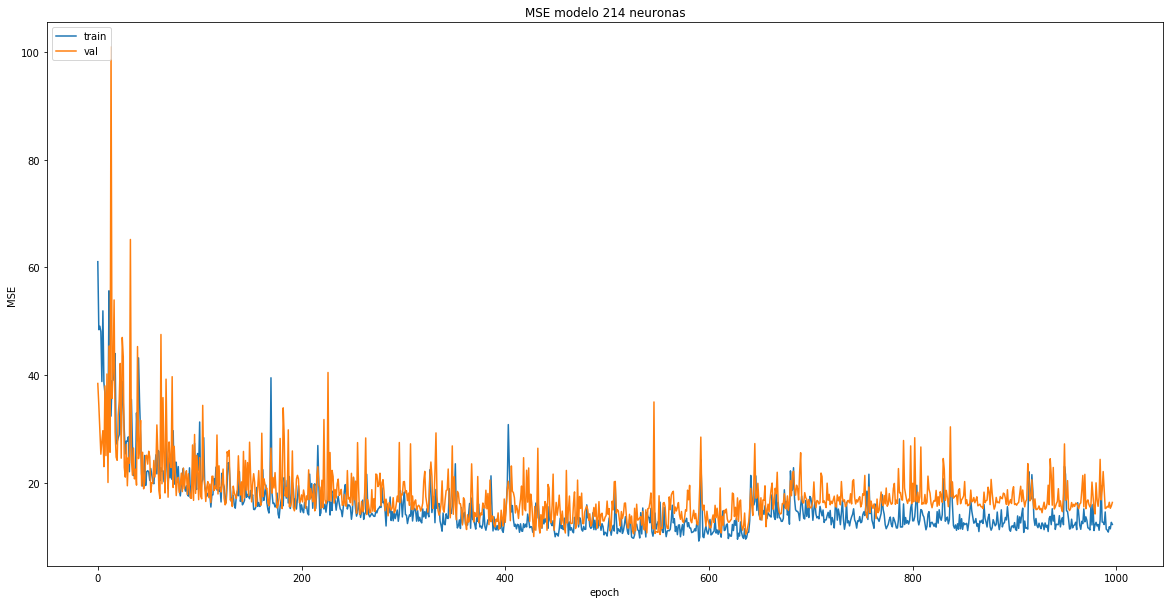

In [261]:
plt.figure(figsize=(20,10))
plt.plot(history_6.history['loss'][3:])
plt.plot(history_6.history['val_loss'][3:])
plt.title('MSE modelo 214 neuronas')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Separacion entre validation y test indica overfitting!